In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
income = pd.read_csv('AW_Data_prered.csv')
income.columns

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'log_YearlyIncome'],
      dtype='object')

In [3]:
income.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,log_YearlyIncome
0,Fremont,California,United States,Bachelors,Management,F,S,0,2,0,5,86931,11.372870
1,Haney,British Columbia,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,11.514175
2,Burbank,California,United States,Graduate Degree,Management,F,M,1,2,0,4,103985,11.552002
3,Burlingame,California,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,11.753209
4,Dunkerque,Nord,France,High School,Manual,F,M,1,1,2,2,21876,9.993145


In [4]:
print(income['Education'].unique())
Features = income['Education']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Bachelors ' 'Graduate Degree' 'High School' 'Partial College'
 'Partial High School']
[0 0 1 1 2 3 0 0 4 0 2 3 2 2 3 1 1 4 3 3 4 0 4 1 1 1 0 3 0 1 0 0 0 0 3 3 3
 1 0 0 0 4 3 1 0 3 2 0 0 1 1 0 0 2 2 0 3 3 2 3 0 4 3 3 3 0 0 1 4 3 0 1 3 3
 3 2 3 0 0 3 0 3 1 0 0 4 1 0 2 0 0 3 1 1 4 3 4 1 2 0 2 1 3 0 1 3 4 0 3 1 3
 1 0 4 3 2 4 3 2 3 3 2 3 4 3 2 4 1 2 1 2 2 2 3 3 2 3 3 3 1 0 2 1 3 2 2 3 0
 4 2 3 4 3 0 0 4 1 3 0 3 2 3 0 2 1 0 0 2 0 4 1 3 2 1 1 4 1 2 2 2 3 4 0 0 4
 0 0 0 3 3 4 0 0 1 0 4 1 0 1 0 3 2 3 3 0 2 3 0 0 3 3 2 0 3 3 0 0 2 1 0 1 3
 0 0 3 2 3 3 2 1 3 1 2 0 3 4 2 0 0 3 3 2 0 3 1 0 0 4 1 3 1 0 4 1 0 3 2 4 0
 3 3 2 0 3 3 0 4 0 0 3 0 1 0 3 3 0 4 3 2 2 3 2 3 4 2 4 3 0 0 2 1 1 0 1 0 0
 3 4 3 3 0 0 1 0 0 0 3 1 0 0 3 0 3 1 4 2 2 2 3 2 2 3 2 2 0 3 3 0 0 0 1 1 3
 0 0 3 1 2 0 2 3 0 3 0 3 3 1 4 0 1 1 0 0 2 0 1 0 2 4 3 3 0 3 0 4 2 0 2 0 1
 3 1 1 3 0 0 3 1 3 2 0 3 4 1 0 2 0 3 0 2 1 0 3 2 3 0 3 3 2 2 1 3 0 3 0 1 0
 2 3 1 3 4 0 0 3 2 3 1 2 3 0 4 0 0 0 2 1 4 2 0 3 3 3 3 3 4 0 0 2 1 3 0 1 1
 0 3 1 4 0 1

In [5]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [6]:
def encode_string(cat_feature):
    #encode strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    #applying one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

columns =['Occupation','Gender','MaritalStatus']
for col in columns:
    temp = encode_string(income[col])
    Features = np.concatenate([Features,temp],axis=1)
print (Features.shape)    
print(Features[:2,:])

(500, 14)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.]]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a L

In [7]:
income.head(0)

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,log_YearlyIncome


In [8]:
Features = np.concatenate([Features, np.array(income[['HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome']])], axis = 1)
Features[:2,:]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 5.00000e+00, 8.69310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 2.00000e+00, 4.00000e+00, 1.00125e+05]])

In [9]:
# spliting the dataset
# using train_test_split func from sklearn.model_selection
# Randomly sample cases to create indepedent training and test data
nr.seed(9988)
labels =np.array(income['log_YearlyIncome'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size =40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])



In [10]:
# rescaling numeric features
#using standardScaler func from sklearn preprocessing
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] =scaler.transform(x_train[:,14:])
x_test[:,14:] =scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:5,:]

(460, 19)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.70941382,
         0.37929832,  0.54789346,  1.06968093,  0.40565809],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.70941382,
        -1.40108156,  1.17955007,  1.06968093,  0.02121541],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        , -1.40961448,
        -1.40108156, -0.71541978,  1.66109106,  0.30353666],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [11]:
#construct linear regression model
#using  Linear regression model from sklearn lnear_model
#define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [12]:
#examining the value of the intercept and coefficients
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.61901844e+00  1.61832707e+00  1.56954104e+00  1.60436066e+00
  1.50547179e+00  1.65374842e+00  1.66555505e+00  1.13125130e+00
  1.74985343e+00  1.71631081e+00  3.96158011e+00  3.95513890e+00
  3.94988499e+00  3.96683401e+00  1.80272585e-02 -6.62904043e-03
 -1.11532384e-02  9.89457778e-05  4.75375065e-01]


In [13]:
#evaluating the model
def print_metrics(y_true,y_predicted,n_parameters):
    #compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true,y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters)*(1-r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

y_score = lin_mod.predict(x_test)
print_metrics(y_test, y_score, 28)

   

Mean Square Error      = 0.017136839474432675
Root Mean Square Error = 0.13090775177365424
Mean Absolute Error    = 0.08883748979493933
Median Absolute Error  = 0.056249505582096404
R^2                    = 0.9458020337401485
Adjusted R^2           = 0.8238566096554826


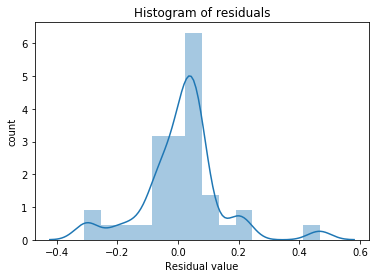

In [14]:
def hist_resids(y_test, y_score):
    ##first compute vector of residuals
    resids =np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    #make residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')

hist_resids(y_test, y_score)    
    

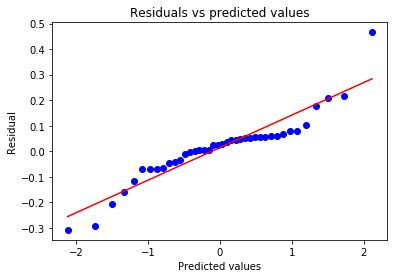

In [15]:
def resid_qq(y_test,y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ss.probplot(resids.flatten(), plot =plt)
    plt.title('Residuals vs predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
resid_qq(y_test,y_score)   

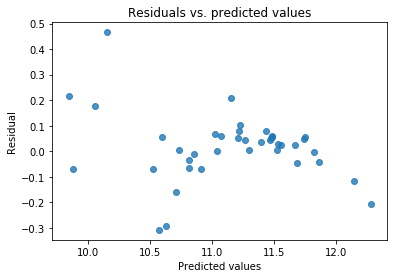

In [16]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

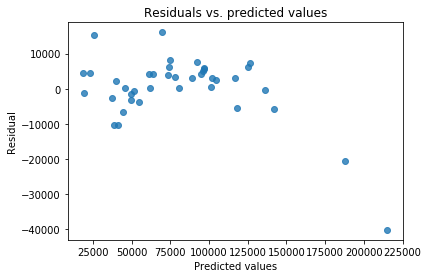

In [17]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 